In [47]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWZ_DOSW = graduates_data['P_WWZ_DOSW']  # Względny Wskaźnik Zarobków DOSW
P_WWZ_NDOSW = graduates_data['P_WWZ_NDOSW']  # Względny Wskaźnik Zarobków NDOSW
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów


/tmp/ipykernel_10812/3182392546.py:11: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_10812/3182392546.py:12: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memo

0    S
1    S
2    S
3    S
4    S
5    S
6    S
7    S
8    S
9    N
Name: P_FORMA, dtype: object


In [ ]:
# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        # Zastępuj przecinki na kropki z uwzględnieniem brakujących wartości
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        # Zamień na float z obsługą brakujących wartości
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')

# Sprawdzenie typu danych po konwersji
print(graduates_data['P_CZAS_PRACA_DOSW'].dtypes)

# Podgląd danych po konwersji
print(graduates_data['P_CZAS_PRACA_DOSW'].head())


float64
0     2.00
1    18.00
2     8.00
3      NaN
4     4.12
Name: P_CZAS_PRACA_DOSW, dtype: float64


In [51]:
from sklearn.preprocessing import LabelEncoder

# Load datasets
# graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
# students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Encoding categorical variables
label_encoder = LabelEncoder()

print(graduates_data["P_FORMA"].head(10))
graduates_data['P_FORMA'] = label_encoder.fit_transform(graduates_data['P_FORMA'])
print(graduates_data["P_FORMA"].head(10))

0    S
1    S
2    S
3    S
4    S
5    S
6    S
7    S
8    S
9    N
Name: P_FORMA, dtype: object
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
Name: P_FORMA, dtype: int64


In [ ]:
graduates_data.describe

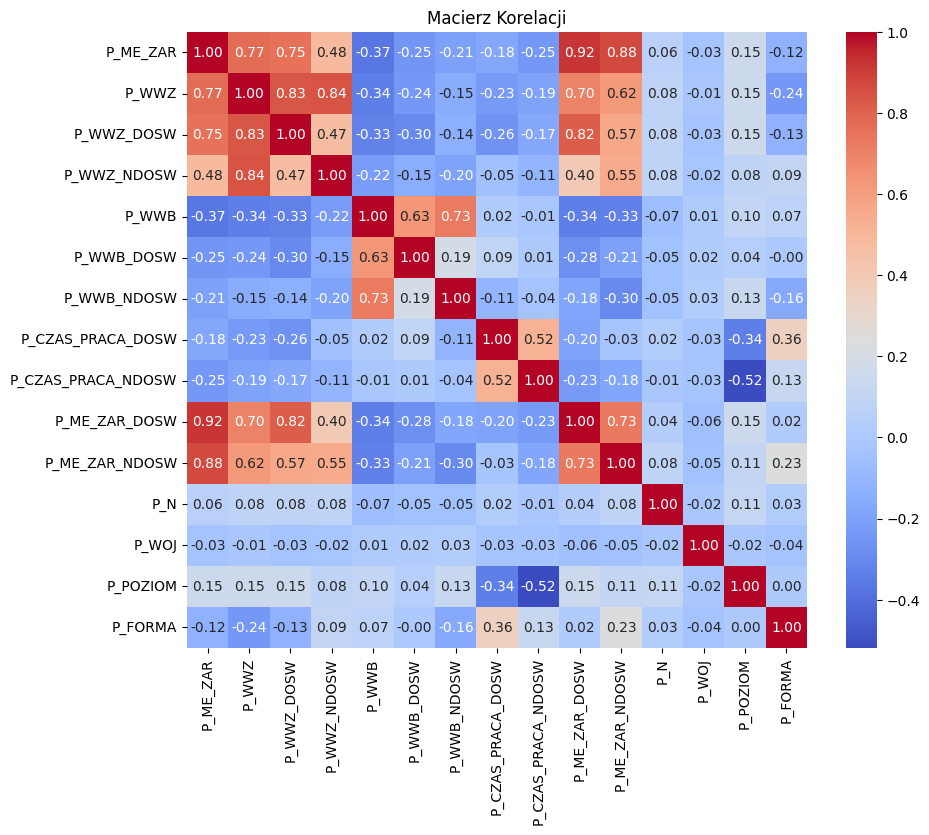

In [57]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load datasets
# graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
# students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Encoding categorical variables
label_encoder = LabelEncoder()

# Assuming these are categorical
graduates_data['P_WOJ'] = label_encoder.fit_transform(graduates_data['P_WOJ'])
graduates_data['P_POZIOM'] = label_encoder.fit_transform(graduates_data['P_POZIOM'])
graduates_data['P_FORMA'] = label_encoder.fit_transform(graduates_data['P_FORMA'])

# Selecting relevant numeric variables for correlation matrix
numeric_columns = [
    'P_ME_ZAR', 'P_WWZ', 'P_WWZ_DOSW', 'P_WWZ_NDOSW',
    'P_WWB', 'P_WWB_DOSW', 'P_WWB_NDOSW', 'P_CZAS_PRACA_DOSW',
    'P_CZAS_PRACA_NDOSW', 'P_ME_ZAR_DOSW', 'P_ME_ZAR_NDOSW', 'P_N','P_WOJ','P_POZIOM','P_FORMA'
]

# Creating a correlation matrix for numeric variables
correlation_matrix = graduates_data[numeric_columns].corr()

# Displaying the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz Korelacji')
plt.show()


In [54]:

print(graduates_data['P_FORMA'].head(30))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
Name: P_FORMA, dtype: int64


Unikalne wartości w P_FORMA po kodowaniu: [nan]


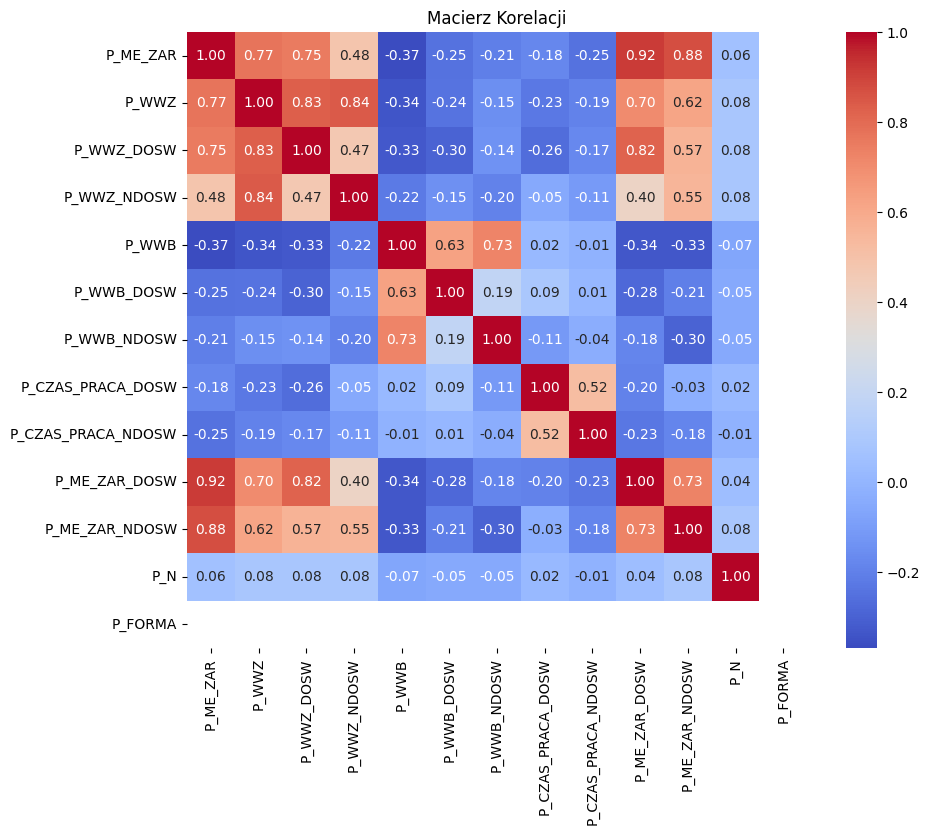

In [32]:
# Binarne kodowanie zmiennej P_FORMA
graduates_data['P_FORMA'] = graduates_data['P_FORMA'].map({'S': 1, 'N': 0})

# Sprawdzenie unikalnych wartości po kodowaniu
print("Unikalne wartości w P_FORMA po kodowaniu:", graduates_data['P_FORMA'].unique())

# Lista zmiennych numerycznych do analizy korelacji
numeric_columns = [
    'P_ME_ZAR', 'P_WWZ', 'P_WWZ_DOSW', 'P_WWZ_NDOSW',
    'P_WWB', 'P_WWB_DOSW', 'P_WWB_NDOSW', 'P_CZAS_PRACA_DOSW',
    'P_CZAS_PRACA_NDOSW', 'P_ME_ZAR_DOSW', 'P_ME_ZAR_NDOSW', 'P_N',
    'P_FORMA'
]

# Tworzenie macierzy korelacji
correlation_matrix = graduates_data[numeric_columns].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz Korelacji')
plt.show()


In [38]:
# Podejrzenie pierwszych 10 wierszy po kodowaniu
print(graduates_data[['P_POZIOM']].head(20))

    P_POZIOM
0          0
1          0
2          1
3          1
4          0
5          2
6          0
7          1
8          0
9          0
10         1
11         1
12         1
13         0
14         1
15         1
16         0
17         1
18         1
19         0


In [ ]:
# Binarne kodowanie zmiennej P_FORMA
graduates_data['P_FORMA'] = graduates_data['P_FORMA'].map({'S': 1, 'N': 0})

# Sprawdzenie unikalnych wartości po kodowaniu
print("Unikalne wartości w P_FORMA po kodowaniu:", graduates_data['P_FORMA'].unique())

# Lista zmiennych numerycznych do analizy korelacji
numeric_columns = [
    'P_ME_ZAR', 'P_WWZ', 'P_WWZ_DOSW', 'P_WWZ_NDOSW',
    'P_WWB', 'P_WWB_DOSW', 'P_WWB_NDOSW', 'P_CZAS_PRACA_DOSW',
    'P_CZAS_PRACA_NDOSW', 'P_ME_ZAR_DOSW', 'P_ME_ZAR_NDOSW', 'P_N',
    'P_FORMA'
]

# Tworzenie macierzy korelacji
correlation_matrix = graduates_data[numeric_columns].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz Korelacji')
plt.show()
